In [1]:
import numpy as np
import itertools
import scipy.sparse as sparse
import os
import pickle

import matplotlib.pyplot as plt
import importlib
import mtgcardclassification
importlib.reload(mtgcardclassification)
from mtgcardclassification import *


In [2]:
#change this to a local folder on your PC in which "scryfall-all-cards.txt" is stored
direc = 'C:/Users/basvanopheusden/Documents/MTG/'

if os.path.exists(direc + 'scryfall-all-cards-pickled.txt'):
    print('using pre-generated all_cards')
    all_cards = pickle_load(direc,'scryfall-all-cards-pickled.txt')
else: 
    all_cards = load_all_cards(direc)

if os.path.exists(direc + 'scryfall-filtered-cards-pickled.txt'):
    print('using pre-generated filtered_cards')
    filtered_cards = pickle_load(direc,'scryfall-filtered-cards-pickled.txt')
else: 
    filtered_cards = get_filtered_cards(direc,all_cards)


using pre-generated all_cards
using pre-generated filtered_cards


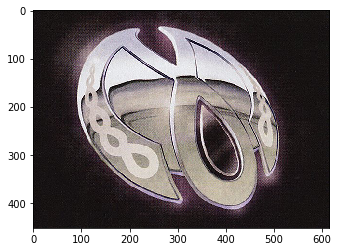

In [3]:
card = np.random.choice(filtered_cards)
art = get_cropped_art(card)
plt.imshow(art)
plt.show()

In [4]:
unique_card_names,index,num_reprints = np.unique([c['name'] for c in filtered_cards[::-1]],
                                                 return_counts = True,return_index=True)
unique_filtered_cards = [filtered_cards[::-1][i] for i in index]
#reversing the filtered_cards list is necessary to select the first printed edition of each card
print('Number of unique filtered cards:',len(unique_filtered_cards))

Number of unique filtered cards: 17317


In [5]:
most_reprinted_cards = np.array(list(zip(unique_card_names,num_reprints)))[np.argsort(num_reprints)[::-1]][:50]

In [6]:
illegal_cards = list(filter(lambda c: not c['legalities']['vintage'] in ['legal','restricted'], filtered_cards))

In [7]:
#leagcy, do not use
#def get_color_asymmetry(f):
#    if np.sum(f[1:])>0:
#        return sts.power_divergence(f[1:],(color_counts[1:]/np.sum(color_counts[1:])*np.sum(f[1:])),lambda_ = "log-likelihood")
#    else:
#        return 0,1

In [8]:
mono_colors = [['W'],['U'],['B'],['R'],['G']]
keys = ['name','power','toughness','type','subtype','manacost','oracletext']
m,matching_cards,inds = classify_card_colors_kfold(unique_filtered_cards,keys,10,mono_colors)

[['W'], ['U'], ['B'], ['R'], ['G']]
loading cards
building design matrix
building design matrix for name
building design matrix for power
building design matrix for toughness
building design matrix for type
building design matrix for subtype
building design matrix for manacost
building design matrix for oracletext
starting fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 102 seconds


C:\Users\basvanopheusden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 104 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 102 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 102 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 107 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 102 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 108 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 112 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 99 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 117 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


In [22]:
with open(direc + 'classification_model_5c_pickled.txt','wb') as f:
    pickle.dump((m,matching_cards),f)

In [23]:
most_predictive_features = get_most_predictive_features(m)
#Note: this does not work for binary classification, only 2+ colors
[(x,y,c) for ((x,y),d,c) in most_predictive_features]

[('subtype', 'Zombie', 'B'),
 ('subtype', 'Merfolk', 'U'),
 ('subtype', 'Elf', 'G'),
 ('oracletext', 'haste', 'R'),
 ('subtype', 'Goblin', 'R'),
 ('subtype', 'Angel', 'W'),
 ('subtype', 'Illusion', 'U'),
 ('subtype', 'Demon', 'B'),
 ('subtype', 'Vampire', 'B'),
 ('subtype', 'Skeleton', 'B'),
 ('oracletext', 'reach', 'G'),
 ('subtype', 'Cleric', 'W'),
 ('oracletext', 'vigilance', 'W'),
 ('oracletext', 'deathtouch', 'B'),
 ('subtype', 'Druid', 'G'),
 ('oracletext', 'fear', 'B'),
 ('subtype', 'Kor', 'W'),
 ('subtype', 'Soldier', 'W'),
 ('subtype', 'Minotaur', 'R'),
 ('subtype', 'Rat', 'B'),
 ('subtype', 'Plant', 'G'),
 ('oracletext', 'with_flying', 'G'),
 ('oracletext', 'forestwalk', 'G'),
 ('subtype', 'Vedalken', 'U'),
 ('subtype', 'Wizard', 'U'),
 ('subtype', 'Knight', 'W'),
 ('subtype', 'Horror', 'B'),
 ('oracletext', 'discards', 'B'),
 ('name', 'goblin', 'R'),
 ('oracletext', 'flying', 'U'),
 ('oracletext', 'green', 'G'),
 ('subtype', 'Fish', 'U'),
 ('subtype', 'Dryad', 'G'),
 ('subty

In [24]:
accuracy = np.mean(m.is_correct)
print(accuracy)

0.7971003375268487


In [25]:
def plot_predicted_dist(m,i,alpha=1):
    plt.bar(np.arange(0,len(m.unique_colors)),m.predicted_color_dists[i,:],alpha=alpha)
    plt.xticks(np.arange(0,len(m.unique_colors)),labels=m.unique_colors, rotation=90)
    plt.show()

def show_classification_info(m,cards,i,show_plot=True):
    card = cards[i]
    predicted_colors = m.unique_colors[np.argmax(m.predicted_color_dists[i,:])]
    
    features,importance,intercept = m.get_features_by_importance(i,predicted_colors)
    
    print('----------------')
    print("Card:",card['name'])
    print("Colors:",card["colors"])
    print("Mana cost:",card['mana_cost'])
    print("type:",card["type_line"])
    print("Predicted colors",[predicted_colors])
    print("Confidence:",m.confidence[i])
    print("Oracle text:",card['oracle_text'])
    print("Intercept:",intercept)
    print("Strongest features:",[(features[k],importance[k]) for k in np.argsort(importance)[::-1] if importance[k]>0][:10])
    if show_plot:
        plot_predicted_dist(m,i)

----------------
Card: Firemantle Mage
Colors: ['R']
Mana cost: {2}{R}
type: Creature — Human Shaman Ally
Predicted colors ['R']
Confidence: 0.7647057171078494
Oracle text: Rally — Whenever Firemantle Mage or another Ally enters the battlefield under your control, creatures you control gain menace until end of turn. (A creature with menace can't be blocked except by two or more creatures.)
Intercept: -0.0025983100588599685
Strongest features: [(('oracletext', 'menace'), 0.8888157498560249), (('subtype', 'Shaman'), 0.832706168247234), (('toughness', '2'), 0.6749169801407021), (('name', 'mage'), 0.4871183104172369), (('oracletext', 'end'), 0.2553170204220222), (('oracletext', 'creatures_you'), 0.21789426114558), (('type', 'Creature'), 0.14522161556657712), (('oracletext', 'the'), 0.12215251507591086), (('oracletext', 'until'), 0.12099197182425456), (('oracletext', 'enters'), 0.08520385417868193)]


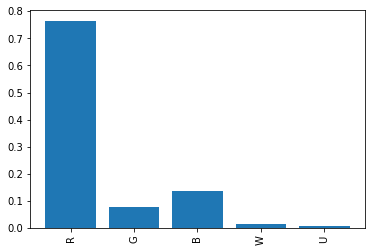

----------------
Card: Mudbutton Torchrunner
Colors: ['R']
Mana cost: {2}{R}
type: Creature — Goblin Warrior
Predicted colors ['R']
Confidence: 0.9985338774286103
Oracle text: When Mudbutton Torchrunner dies, it deals 3 damage to any target.
Intercept: -0.0025983100588599685
Strongest features: [(('subtype', 'Goblin'), 2.4279419692841735), (('oracletext', 'deals'), 0.9199403405427631), (('oracletext', 'damage'), 0.78382744269038), (('toughness', '1'), 0.5882102718647183), (('subtype', 'Warrior'), 0.48911236178488043), (('oracletext', 'damage_to'), 0.353924530383682), (('oracletext', 'any_target'), 0.3455939942280844), (('oracletext', 'to_any'), 0.34464608133406877), (('oracletext', 'any'), 0.2875140007870987), (('oracletext', 'damage_to_any'), 0.24491715695031924)]


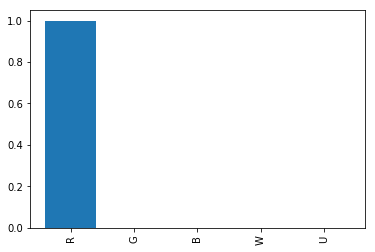

----------------
Card: Turret Ogre
Colors: ['R']
Mana cost: {3}{R}
type: Creature — Ogre Warrior
Predicted colors ['R']
Confidence: 0.9160129518218737
Oracle text: Reach
When Turret Ogre enters the battlefield, if you control another creature with power 4 or greater, Turret Ogre deals 2 damage to each opponent.
Intercept: 0.006067876569051405
Strongest features: [(('subtype', 'Ogre'), 1.1340476347928734), (('oracletext', 'deals'), 1.0384491369935338), (('name', 'ogre'), 0.7566188099924738), (('oracletext', 'damage'), 0.6791180909294703), (('subtype', 'Warrior'), 0.5301981754813115), (('oracletext', 'damage_to'), 0.34717878384012224), (('oracletext', 'to_each'), 0.32170744399272244), (('toughness', '3'), 0.2748148102408063), (('oracletext', 'ogre'), 0.26811298936805233), (('oracletext', 'with'), 0.22483000006920018)]


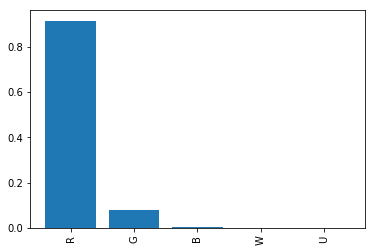

----------------
Card: Tusked Colossodon
Colors: ['G']
Mana cost: {4}{G}{G}
type: Creature — Beast
Predicted colors ['G']
Confidence: 0.7079121477249056
Oracle text: 
Intercept: 0.013434632444341123
Strongest features: [(('type', 'Creature'), 0.9509250983046423), (('subtype', 'Beast'), 0.7521285250778752), (('power', '6'), 0.2977692525017012), (('manacost', '{@}'), 0.05027580331845737)]


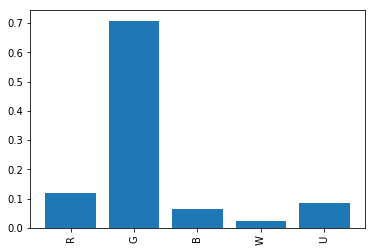

----------------
Card: Kithkin Mourncaller
Colors: ['G']
Mana cost: {2}{G}
type: Creature — Kithkin Scout
Predicted colors ['W']
Confidence: 0.5872483388247428
Oracle text: Whenever an attacking Kithkin or Elf is put into your graveyard from the battlefield, you may draw a card.
Intercept: 0.014991546271346655
Strongest features: [(('subtype', 'Kithkin'), 0.8383637223153042), (('power', '2'), 0.7645189829540804), (('subtype', 'Scout'), 0.6077292100706025), (('oracletext', 'kithkin'), 0.4630912053129545), (('oracletext', 'from_the'), 0.380153323555214), (('oracletext', 'attacking'), 0.35559361155093844), (('oracletext', 'the_battlefield'), 0.2882082638547721), (('oracletext', 'from'), 0.23397105720544153), (('oracletext', 'you'), 0.19011442590390262), (('oracletext', 'battlefield'), 0.13431455066971387)]


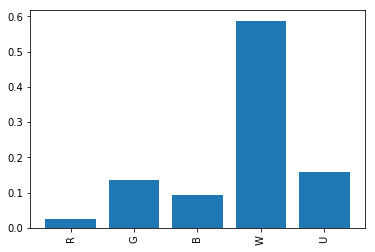

----------------
Card: Foxfire
Colors: ['G']
Mana cost: {2}{G}
type: Instant
Predicted colors ['U']
Confidence: 0.4048447901693682
Oracle text: Untap target attacking creature. Prevent all combat damage that would be dealt to and dealt by that creature this turn.
Draw a card at the beginning of the next turn's upkeep.
Intercept: 0.0010372537089546972
Strongest features: [(('oracletext', 'draw'), 1.2210131084686644), (('oracletext', 'untap'), 0.6535166323940343), (('oracletext', 'upkeep'), 0.30373007756134424), (('oracletext', 'to'), 0.29963735269892844), (('oracletext', 'creature_this'), 0.2727666130648521), (('type', 'Instant'), 0.25171409792386834), (('oracletext', 'turn'), 0.23004400790245694), (('oracletext', 'combat_damage'), 0.22177340688445774), (('oracletext', 'dealt'), 0.1827004768588723), (('oracletext', 'target'), 0.17831150607324564)]


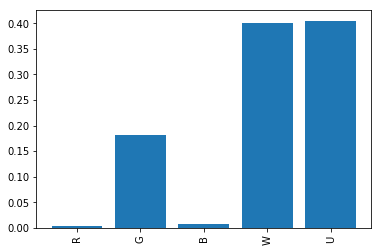

----------------
Card: Pheres-Band Raiders
Colors: ['G']
Mana cost: {5}{G}
type: Creature — Centaur Warrior
Predicted colors ['G']
Confidence: 0.9920756585431145
Oracle text: Inspired — Whenever Pheres-Band Raiders becomes untapped, you may pay {2}{G}. If you do, create a 3/3 green Centaur enchantment creature token.
Intercept: 0.013434632444341123
Strongest features: [(('oracletext', 'green'), 1.475862880816713), (('subtype', 'Centaur'), 1.1903471213683847), (('type', 'Creature'), 0.9509250983046423), (('oracletext', 'enchantment'), 0.5922787377588508), (('oracletext', 'creature_token'), 0.48404732188485783), (('oracletext', 'token'), 0.32801108330449336), (('oracletext', 'centaur'), 0.2221216190627083), (('oracletext', 'whenever'), 0.1899258214425229), (('oracletext', '3/3'), 0.1803987104223814), (('subtype', 'Warrior'), 0.14784978410835875)]


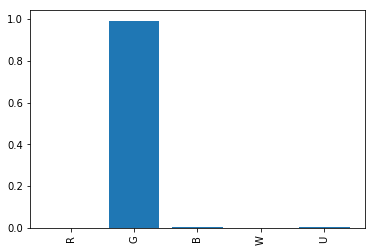

----------------
Card: Hawkeater Moth
Colors: ['G']
Mana cost: {3}{G}
type: Creature — Insect
Predicted colors ['U']
Confidence: 0.3251199141504172
Oracle text: Flying
Shroud (This creature can't be the target of spells or abilities.)
Intercept: 0.00526278691341776
Strongest features: [(('oracletext', 'flying'), 1.466613886335928), (('power', '1'), 0.63580181931556), (('manacost', '{3}'), 0.2222369600944351), (('oracletext', 'shroud'), 0.12811394136659104)]


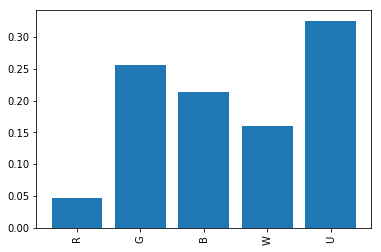

----------------
Card: Burden of Greed
Colors: ['B']
Mana cost: {3}{B}
type: Instant
Predicted colors ['B']
Confidence: 0.6008912646362765
Oracle text: Target player loses 1 life for each tapped artifact they control.
Intercept: -0.04196794326156673
Strongest features: [(('oracletext', 'life'), 1.071281096278241), (('oracletext', 'loses'), 0.613991953453685), (('oracletext', '1_life'), 0.47275664371490844), (('oracletext', 'player_loses'), 0.3569939725976013), (('oracletext', 'player'), 0.19786173383463196), (('oracletext', 'target_player'), 0.10506215677868663), (('manacost', '{@}'), 0.09623911465293114), (('oracletext', 'tapped'), 0.09435912749386087), (('oracletext', 'for'), 0.07941980887584292), (('oracletext', 'loses_1_life'), 0.04617552054715744)]


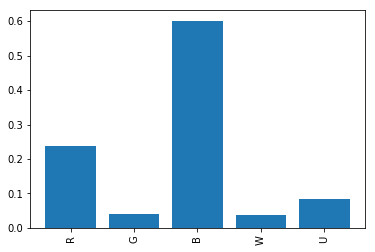

----------------
Card: Cloudthresher
Colors: ['G']
Mana cost: {2}{G}{G}{G}{G}
type: Creature — Elemental
Predicted colors ['G']
Confidence: 0.993961915051704
Oracle text: Flash
Reach
When Cloudthresher enters the battlefield, it deals 2 damage to each creature with flying and each player.
Evoke {2}{G}{G} (You may cast this spell for its evoke cost. If you do, it's sacrificed when it enters the battlefield.)
Intercept: 0.020566933522271156
Strongest features: [(('oracletext', 'reach'), 1.8994519703794108), (('oracletext', 'with_flying'), 1.4736363247886872), (('oracletext', 'creature_with_flying'), 1.331098896909382), (('type', 'Creature'), 0.9321486442253832), (('oracletext', 'creature_with'), 0.6458308364031948), (('oracletext', 'to_each_creature_with'), 0.3705780185301608), (('oracletext', 'damage_to_each_creature_with'), 0.3705780185301608), (('oracletext', 'each_creature_with_flying'), 0.30598916089481204), (('oracletext', 'to_each_creature_with_flying'), 0.30598916089481204), (('o

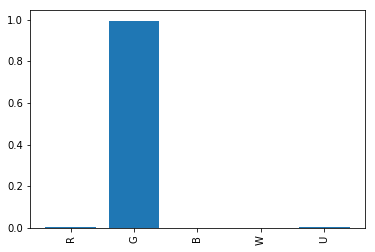

In [26]:
for _ in range(10):
    show_classification_info(m,matching_cards,np.random.randint(len(inds)))

In [27]:
for color in m.unique_colors:
    if len(color)==1:
        priority = m.confidence*(m.unique_colors[m.predicted_color]==color)
        #priority = (m.is_correct==0)*m.confidence*(m.unique_colors[m.predicted_color]==color)
        #and len(get_words_in_oracle_text(card))<10 for card in cards])
        ind = np.argsort(priority)[::-1]
        for i in ind[:10]:
            if priority[i]>0:
                show_classification_info(m,matching_cards,i,False)

----------------
Card: Goblin Bangchuckers
Colors: ['R']
Mana cost: {2}{R}{R}
type: Creature — Goblin Warrior
Predicted colors ['R']
Confidence: 0.999999844951497
Oracle text: {T}: Flip a coin. If you win the flip, Goblin Bangchuckers deals 2 damage to any target. If you lose the flip, Goblin Bangchuckers deals 2 damage to itself.
Intercept: -0.0025983100588599685
Strongest features: [(('subtype', 'Goblin'), 2.4279419692841735), (('name', 'goblin'), 1.4075895454548417), (('oracletext', 'flip'), 1.1493781897339526), (('oracletext', 'deals'), 0.9199403405427631), (('oracletext', 'damage'), 0.78382744269038), (('toughness', '2'), 0.6749169801407021), (('subtype', 'Warrior'), 0.48911236178488043), (('oracletext', 'you_lose_the'), 0.42451847554450056), (('oracletext', 'lose'), 0.4112591024272766), (('oracletext', 'goblin'), 0.4060441880229727)]
----------------
Card: Goblin Kaboomist
Colors: ['R']
Mana cost: {1}{R}
type: Creature — Goblin Warrior
Predicted colors ['R']
Confidence: 0.9999997

Strongest features: [(('subtype', 'Zombie'), 2.7510639805284476), (('oracletext', 'black'), 1.239691188371308), (('oracletext', '-1/-1'), 1.1092398972854367), (('oracletext', 'goblin'), 0.5900505113638296), (('oracletext', 'dies'), 0.5187521787251735), (('toughness', '1'), 0.45118661497824525), (('oracletext', 'gets'), 0.38394283827706804), (('oracletext', 'creature'), 0.36674534037241363), (('oracletext', 'a_card'), 0.346521412696961), (('oracletext', '-1/-1_until'), 0.3084709476109541)]
----------------
Card: Ob Nixilis of the Black Oath
Colors: ['B']
Mana cost: {3}{B}{B}
type: Legendary Planeswalker — Nixilis
Predicted colors ['B']
Confidence: 0.9999872456478608
Oracle text: +2: Each opponent loses 1 life. You gain life equal to the life lost this way.
−2: Create a 5/5 black Demon creature token with flying. You lose 2 life.
−8: You get an emblem with "{1}{B}, Sacrifice a creature: You gain X life and draw X cards, where X is the sacrificed creature's power."
Ob Nixilis of the Black

In [28]:
num_colors = np.array([len(set(c1)) for c1 in m.card_colors])
colors_added = np.array([len(set(c1).difference(set(c2))) 
                         for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])
colors_omitted = np.array([len(set(c2).difference(set(c1))) 
                           for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])

In [29]:
sparse.csr_matrix((np.ones_like(colors_added),(num_colors,colors_added+colors_omitted))).toarray()

array([[    0,     0,     0],
       [10391,     0,  2645]], dtype=int32)

----------------
Card: Grizzly Bears
Colors: ['G']
Mana cost: {1}{G}
type: Creature — Bear
Predicted colors ['G']
Confidence: 0.6767140274508333
Oracle text: 
Intercept: 0.014721039758449376
Strongest features: [(('subtype', 'Bear'), 0.9986645966996724), (('type', 'Creature'), 0.9801653576332184), (('name', 'bears'), 0.16656602911685378), (('manacost', '{@}'), 0.026812551655177347), (('manacost', '{1}'), 0.023947433524592877)]


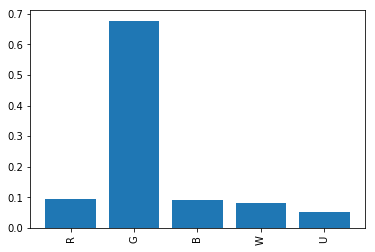

In [30]:
show_classification_info(m,matching_cards,get_card_index_by_name(matching_cards,'grizzly bears'))

In [32]:
def plot_accuracy_by_key(f,keys=None,is_numeric=True,sort_by_count=True,xlabel='',return_values=False):
    x = np.array([f(c) for c in matching_cards])
    if keys==None:
        keys,counts = np.unique(x,return_counts=True)
        if sort_by_count:
            keys = keys[np.argsort(counts)][::-1]
    x_by_key = {key: m.is_correct[np.logical_and(x==key,m.confidence>0)] for key in keys}
    y = [np.mean(x) for key,x in x_by_key.items()]
    yerr = [np.std(x)/np.sqrt(len(x)) for key,x in x_by_key.items()]
    plt.errorbar(x=keys,y=y,yerr=yerr)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    if not is_numeric:
        plt.xticks(np.arange(0,len(keys)),label=keys,rotation=90)
    plt.show()
    if return_values:
        return keys,y,yerr,x_by_key

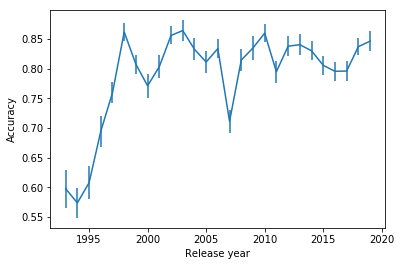

In [35]:
#plot_accuracy_by_key(lambda c:c['rarity'],keys=['common','uncommon','rare','mythic'],is_numeric=False)
#plot_accuracy_by_key(lambda c:len(get_words_in_oracle_text(c)),sort_by_count=False,xlabel='Number of words in oracle text')
#plot_accuracy_by_key(lambda c:c['type_line'].split(' — ')[0],is_numeric=False)
plot_accuracy_by_key(lambda c:int(c['released_at'].split('-')[0]),sort_by_count=False,xlabel='Release year')

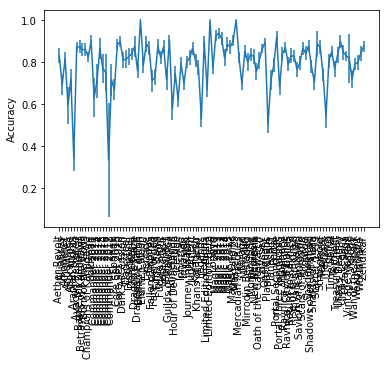

[('Commander 2017', 3, 0.3333333333333333),
 ('Arabian Nights', 52, 0.34615384615384615),
 ('Planar Chaos', 139, 0.5035971223021583),
 ('Legends', 187, 0.5294117647058824),
 ('The Dark', 85, 0.5411764705882353),
 ('Homelands', 90, 0.5777777777777777),
 ('Antiquities', 32, 0.59375),
 ('Ice Age', 226, 0.6194690265486725),
 ('Commander 2011', 27, 0.6296296296296297),
 ('Limited Edition Alpha', 183, 0.6666666666666666),
 ('Conflux', 90, 0.6666666666666666),
 ('Portal Three Kingdoms', 151, 0.6821192052980133),
 ('Alliances', 94, 0.6914893617021277),
 ('Mirage', 220, 0.6954545454545454),
 ('Invasion', 198, 0.696969696969697),
 ('Shards of Alara', 142, 0.704225352112676),
 ('Commander 2013', 31, 0.7096774193548387),
 ('Fallen Empires', 76, 0.7105263157894737),
 ('Planeshift', 87, 0.7126436781609196),
 ('Commander 2018', 35, 0.7142857142857143),
 ('Guildpact', 88, 0.7159090909090909),
 ('Visions', 113, 0.7168141592920354),
 ('Apocalypse', 85, 0.7176470588235294),
 ('Fate Reforged', 132, 0.7272

In [36]:
keys,y,yerr,x_by_key = plot_accuracy_by_key(lambda c:c['set_name'],is_numeric=False,return_values=True,sort_by_count=False)
# This prints all the sets, plus the number of cards from that set and the model's 
# accuracy on predicting those cards' colors
list(zip(keys[np.argsort(y)],[x_by_key[key].shape[0] for key in keys[np.argsort(y)]],np.sort(y)))

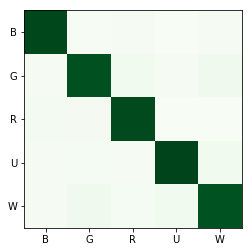

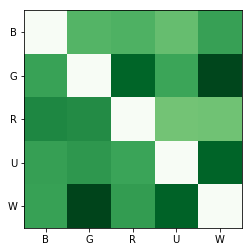

In [37]:
colors, confusion = get_confusion_matrix(m)
plt.imshow(confusion,cmap='Greens')
plt.xticks(np.arange(0,5),labels=colors)
plt.yticks(np.arange(0,5),labels=colors)
plt.show()

plt.imshow(np.triu(confusion,1)+np.tril(confusion,-1),cmap='Greens')
plt.xticks(np.arange(0,5),labels=colors)
plt.yticks(np.arange(0,5),labels=colors)
plt.show()

In [39]:
(confusion + confusion.T)/2

array([[0.80403349, 0.04393415, 0.04826962, 0.04275468, 0.0473196 ],
       [0.04393415, 0.78479087, 0.05849453, 0.04782984, 0.0707599 ],
       [0.04826962, 0.05849453, 0.79924099, 0.04093647, 0.04246676],
       [0.04275468, 0.04782984, 0.04093647, 0.81620553, 0.06416905],
       [0.0473196 , 0.0707599 , 0.04246676, 0.06416905, 0.78185993]])

In [ ]:
#p = m.predicted_color_dists

#JS = np.sum(p[None,:,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)+np.sum(p[:,None,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)
#plt.imshow(JS)
#plt.show()
#X = 1-np.dot(,m.predicted_color_dists.T)

In [ ]:
#u,s,v = np.linalg.svd(p)

In [ ]:
#import sklearn
#X_embedded = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(p)
#N=len(cards)
#X_embedded = TSNE(n_components=2).fit_transform(JS[:N,:N])
#c_dict = {'R' : 'red', 'B' : 'black', 'G' : 'green', 'U' : 'blue', 'W' : 'yellow'}
#for c in colors:
#    ind = np.array(m.card_colors)[:N]==c
#    plt.plot(X_embedded[ind,0],X_embedded[ind,1],'.',color=c_dict[c])